Installing Libraries

In [ ]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize
from collections import defaultdict
import matplotlib.pyplot as plt



Reading dataset and convert dataset to dataframe

In [ ]:
df = pd.read_json(r'/content/SampleData.json')

In [ ]:
df

,-LRHbArGBwe-KuIpvVqq,-LRHbLWJyKVSZEr0Zi-k,-LRHceJ6bVwS_ad2hzK1,-LRHg9EYH_thGhV3as4_,-LRHonYCR9MmBpUtekkK,-LRLOob-PAHkEHBDw-w5,-LRLU-qsTIC9tx1cOaxs,-LRLV4Vj4aMmzRaqib75,-LRLXFDOAEUWK-Q_OyuY,-LRLr81xlGyoY3xMz-HU,...,-LnSinMkzQrM0flOvepq,-LnSjamVLpJfQvNWWgZf,-LnSn-n_Ucyw26P3sc7v,-LnSnQkryZQe9L3YQIsJ,-LnSn_6ufwmQ9fAkIHtp,-LnSo6UOawTWOzAUr_vj,-LnSoT6rmp-wsTOL67rA,-LnSr4k27NiUAAuE2nUh,-LnSxdRehSQhKnCRteFe,-LnSzlE1ASVMA3YyHD_4
items,[-LPQ_S96CqbXnBu0kL-T],[-LPQ_S96CqbXnBu0kL-T],[-LPQaSQd38FTtpwxE-Jl],[-LPQaSQd38FTtpwxE-Jl],"[-LPQb61tpBZq6xPMOc1q, -LPQ_S96CqbXnBu0kL-T]",[-LPQaSQd38FTtpwxE-Jl],[-LPQb61tpBZq6xPMOc1q],"[-LPQ_S96CqbXnBu0kL-T, -LPQaSQd38FTtpwxE-Jl, -...",[-LPQbCkFElq7gPAA2kgY],"[-LPQbCkFElq7gPAA2kgY, -LPQaSQd38FTtpwxE-Jl]",...,[-LPQbCkFElq7gPAA2kgY],[-LPQ_S96CqbXnBu0kL-T],[-LPQ_S96CqbXnBu0kL-T],[-LPQ_S96CqbXnBu0kL-T],[-LPQ_S96CqbXnBu0kL-T],[-LPQ_S96CqbXnBu0kL-T],[-LPQ_S96CqbXnBu0kL-T],[-LPQ_S96CqbXnBu0kL-T],[-LPQ_S96CqbXnBu0kL-T],[-LPQb61tpBZq6xPMOc1q]
k_user_id,2746,1783,1804,1785,1783,2774,2774,2774,2774,2746,...,1566369891272,1566369891272,1566369891272,1566369891272,1566369891272,1566369891272,1566369891272,1566369891272,1566369891272,1566369891272
paid_amount,100,20,100,20,50,50,20,20,20,20,...,10,10,10,10,10,10,10,10,10,10
paid_at,1542618854646,1543584479212,1543584327289,1543584397564,1543584490821,1542622523853,1542622523853,1542622523853,1542622523853,1542618854646,...,1568097324838,1568097324838,1568097324838,1568097324838,1568097324838,1568097324838,1568097324838,1568097324838,1568097324838,1568097324838
redeemed_at,1542279025879,1542205699711,1542205947020,1542206865264,1542209185121,1542269235938,1542270544003,1542270813840,1542271575721,1542276894728,...,1567089271505,1567088492280,1567089611750,1567089634973,1567091205280,1567090972897,1567089850003,1567090929322,1567092246046,1567092612688
user_id,1780,1783,1804,3067,2817,2790,2789,2779,2792,3086,...,1566769321093,1567086190808,1566830534891,1566912960461,1566979738751,1566924914830,1567085686873,1566146524528,1567091442735,1567091845823



***Exploratory data analysis***


In [ ]:
df = df.transpose()

In [ ]:
df.head()

,items,k_user_id,paid_amount,paid_at,redeemed_at,user_id
-LRHbArGBwe-KuIpvVqq,[-LPQ_S96CqbXnBu0kL-T],2746,100,1542618854646,1542279025879,1780
-LRHbLWJyKVSZEr0Zi-k,[-LPQ_S96CqbXnBu0kL-T],1783,20,1543584479212,1542205699711,1783
-LRHceJ6bVwS_ad2hzK1,[-LPQaSQd38FTtpwxE-Jl],1804,100,1543584327289,1542205947020,1804
-LRHg9EYH_thGhV3as4_,[-LPQaSQd38FTtpwxE-Jl],1785,20,1543584397564,1542206865264,3067
-LRHonYCR9MmBpUtekkK,"[-LPQb61tpBZq6xPMOc1q, -LPQ_S96CqbXnBu0kL-T]",1783,50,1543584490821,1542209185121,2817


Reindexing

In [ ]:
df.reset_index(inplace=True)

**dividing timestamp by 1000 for changing into date format**


In [ ]:
for i in range(0,len(df['paid_at'])):
    df['paid_at'][i] = df['paid_at'][i]/1000
for i in range(0,len(df['paid_at'])):
    df['redeemed_at'][i] = df['redeemed_at'][i]/1000

In [ ]:
df['time'] = df['paid_at']
df['time1'] = df['redeemed_at']

In [ ]:
import datetime

**changing paid_at time to dd_mm_yyyy
make a new column called time and change time format to mm_yyyy**

In [ ]:
for i in range(0,len(df['paid_at'])):
    epoch_time = df['paid_at'][i]
  
    date_time = datetime.datetime.fromtimestamp( epoch_time )  
    df['paid_at'][i] = date_time.strftime("%d-%m-%Y")
    df['time'][i] = date_time.strftime("%m-%Y")

**changing redeemed_at time to dd_mm_yyyy make a new column called time1 and change time1 format to mm_yyyy**

In [ ]:
for i in range(0,len(df['redeemed_at'])):
    epoch_time = df['redeemed_at'][i]
  
    date_time = datetime.datetime.fromtimestamp( epoch_time )  
    df['redeemed_at'][i] = date_time.strftime("%d-%m-%Y")
    df['time1'][i] = date_time.strftime("%m-%Y")


In [ ]:
Pdf.head()

,index,items,k_user_id,paid_amount,paid_at,redeemed_at,user_id,time,time1
0,-LRHbArGBwe-KuIpvVqq,[-LPQ_S96CqbXnBu0kL-T],2746,100,19-11-2018,15-11-2018,1780,11-2018,11-2018
1,-LRHbLWJyKVSZEr0Zi-k,[-LPQ_S96CqbXnBu0kL-T],1783,20,30-11-2018,14-11-2018,1783,11-2018,11-2018
2,-LRHceJ6bVwS_ad2hzK1,[-LPQaSQd38FTtpwxE-Jl],1804,100,30-11-2018,14-11-2018,1804,11-2018,11-2018
3,-LRHg9EYH_thGhV3as4_,[-LPQaSQd38FTtpwxE-Jl],1785,20,30-11-2018,14-11-2018,3067,11-2018,11-2018
4,-LRHonYCR9MmBpUtekkK,"[-LPQb61tpBZq6xPMOc1q, -LPQ_S96CqbXnBu0kL-T]",1783,50,30-11-2018,14-11-2018,2817,11-2018,11-2018


checking how many we have null values

In [ ]:
df.isna().sum()

index          0
items          0
k_user_id      0
paid_amount    0
paid_at        0
redeemed_at    0
user_id        0
time           0
time1          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63649 entries, 0 to 63648
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        63649 non-null  object
 1   items        63649 non-null  object
 2   k_user_id    63649 non-null  object
 3   paid_amount  63649 non-null  object
 4   paid_at      63649 non-null  object
 5   redeemed_at  63649 non-null  object
 6   user_id      63649 non-null  object
 7   time         63649 non-null  object
 8   time1        63649 non-null  object
dtypes: object(9)
memory usage: 4.4+ MB


statistical analysis for data

In [ ]:
df.describe()

,index,items,k_user_id,paid_amount,paid_at,redeemed_at,user_id,time,time1
count,63649,63649,63649,63649,63649,63649,63649,63649,63649
unique,63649,61,89,53,43,283,21438,9,10
top,-LRHbArGBwe-KuIpvVqq,[-LPQ_S96CqbXnBu0kL-T],4052,20,28-01-2019,27-01-2019,2746,01-2019,01-2019
freq,1,40065,10257,54921,8964,1319,41,27324,30508


In [ ]:
df1 = df[['time1',"user_id",'items']]
grouped = df1.groupby(["time1","user_id"])
grouped.count()

items
time1   user_id       
01-2019 1791         2
        1795        12
        1805         5
        1810         1
        1813         5
...                ...
12-2018 10180        1
        10181        1
        10183        1
        10193        1
        10196        1

[29549 rows x 1 columns]

**checking how many transactions happens at different months
by using function groyp by **

In [ ]:
df2 = df[['time1','items']]
grouped2 = df2.groupby(["time1"])
grouped2.count()


,items
time1,
01-2019,30508
02-2019,8831
03-2019,941
04-2019,367
05-2019,134
06-2019,119
07-2019,1354
08-2019,6184
11-2018,2020


In [ ]:
datf = pd.DataFrame(grouped2.count())
datf.reset_index(inplace=True)
datf

,time1,items
0,01-2019,30508
1,02-2019,8831
2,03-2019,941
3,04-2019,367
4,05-2019,134
5,06-2019,119
6,07-2019,1354
7,08-2019,6184
8,11-2018,2020
9,12-2018,13191


**Data visualization**

**we are making histogram plot of time vs number of transactions
for analysing  trends of company's Transaction**

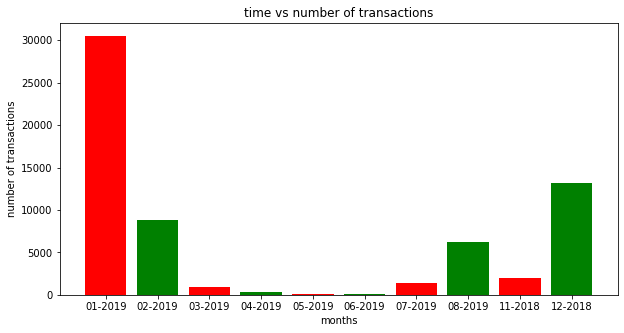

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(datf['time1'], datf["items"],
        width = 0.8, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('months')
# naming the y-axis
plt.ylabel('number of transactions')
# plot title
plt.title('time vs number of transactions')
 
# function to show the plot
plt.show()

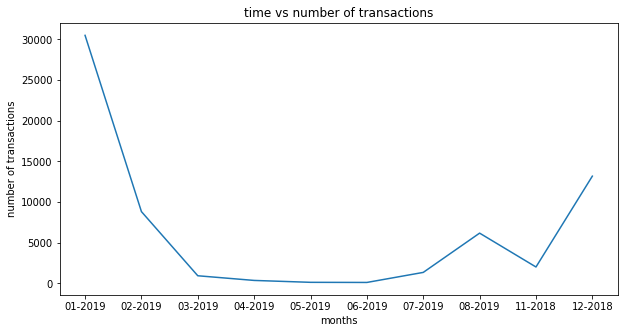

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(datf['time1'], datf["items"])
 
# naming the x-axis
plt.xlabel('months')
# naming the y-axis
plt.ylabel('number of transactions')
# plot title
plt.title('time vs number of transactions')
 
# function to show the plot
plt.show()

**finding no of unique user id for all months
for analysing how many different users we have at differet months**

In [ ]:
x = df.groupby('time1').user_id.nunique()
x = pd.DataFrame(x)
x.reset_index(inplace=True)
x

,time1,user_id
0,01-2019,14123
1,02-2019,5754
2,03-2019,622
3,04-2019,266
4,05-2019,93
5,06-2019,76
6,07-2019,628
7,08-2019,2323
8,11-2018,940
9,12-2018,4724


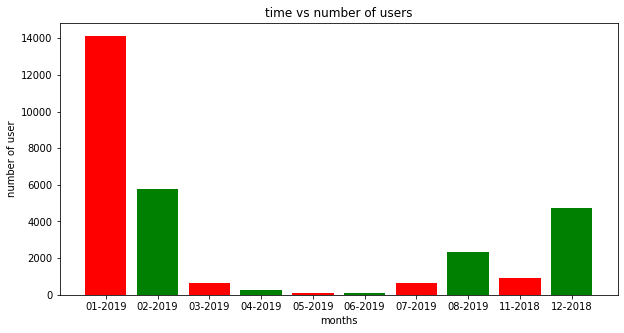

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x['time1'], x["user_id"],
        width = 0.8, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('months')
# naming the y-axis
plt.ylabel('number of user')
# plot title
plt.title('time vs number of users')
 
# function to show the plot
plt.show()

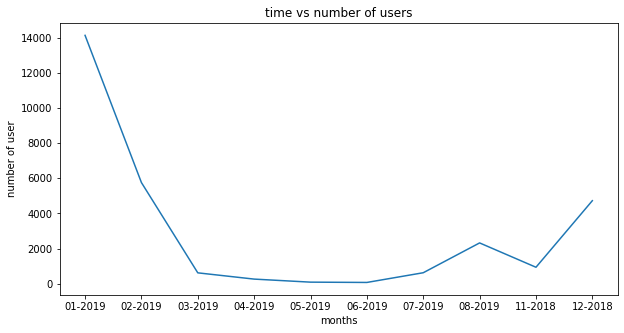

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(x['time1'], x["user_id"])
 
# naming the x-axis
plt.xlabel('months')
# naming the y-axis
plt.ylabel('number of user')
# plot title
plt.title('time vs number of users')
 
# function to show the plot
plt.show()

In [ ]:
y= df.groupby('time1').k_user_id.nunique()
y = pd.DataFrame(y)
y.reset_index(inplace=True)
y

,time1,k_user_id
0,01-2019,33
1,02-2019,27
2,03-2019,19
3,04-2019,6
4,05-2019,8
5,06-2019,6
6,07-2019,13
7,08-2019,20
8,11-2018,15
9,12-2018,15


**finding no of unique k_user id for all months
for analysing how many different merchants we have at differet months**

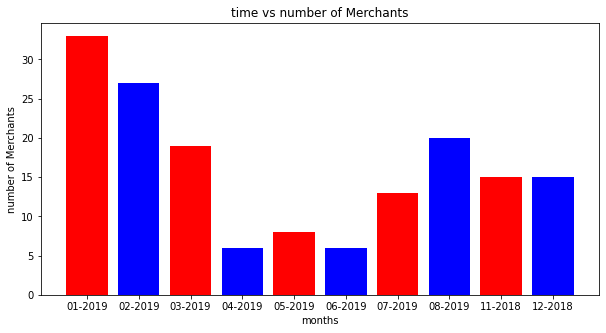

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(y['time1'], y["k_user_id"],
        width = 0.8, color = ['red', 'blue'])
 
# naming the x-axis
plt.xlabel('months')
# naming the y-axis
plt.ylabel('number of Merchants')
# plot title
plt.title('time vs number of Merchants')
 
# function to show the plot
plt.show()

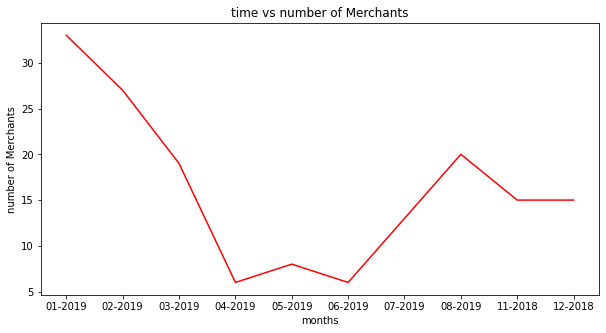

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(y['time1'], y["k_user_id"],
        color = 'red')
 
# naming the x-axis
plt.xlabel('months')
# naming the y-axis
plt.ylabel('number of Merchants')
# plot title
plt.title('time vs number of Merchants')
 
# function to show the plot
plt.show()

In [ ]:
column=df['time1'].unique()
column

array(['11-2018', '12-2018', '01-2019', '02-2019', '03-2019', '04-2019',
       '05-2019', '06-2019', '07-2019', '08-2019'], dtype=object)

In [ ]:
df3 = pd.DataFrame(columns=column ,index =df["user_id"].unique())
df3

,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019
1780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1567004704662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567086190808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567085686873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567091442735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 **making an overview of No. of transactions per User for the period between Nov 2018
to September 2019**

making dict of dict
deafult valu of all dict key is 0

In [ ]:
user_transaction = defaultdict(lambda: defaultdict(int))


In [ ]:
for i in df.itertuples():
  user_transaction[i.user_id][i.time1]+=1


In [ ]:
users_ids = df["user_id"].unique()


In [ ]:


rows = []
for u in users_ids:
  temp = []
  for tim in column:
    temp.append(user_transaction[u][tim])
  rows.append(temp)



In [ ]:
dataset = pd.DataFrame(rows, columns=column)

In [ ]:
dataset.head()

,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019
0,1,0,0,1,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0
2,4,2,0,1,0,0,0,0,1,2
3,1,0,0,0,0,0,0,0,1,0
4,2,1,0,0,0,0,0,0,0,0


In [ ]:
dataset["user_id"] = users_ids
dataset.head()

,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019,user_id
0,1,0,0,1,0,0,0,0,0,0,1780
1,7,0,0,0,0,0,0,0,0,0,1783
2,4,2,0,1,0,0,0,0,1,2,1804
3,1,0,0,0,0,0,0,0,1,0,3067
4,2,1,0,0,0,0,0,0,0,0,2817


In [ ]:
first_column = dataset.pop('user_id')
dataset.insert(0, 'user_id', first_column)

In [ ]:
dataset.head()

,user_id,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019
0,1780,1,0,0,1,0,0,0,0,0,0
1,1783,7,0,0,0,0,0,0,0,0,0
2,1804,4,2,0,1,0,0,0,0,1,2
3,3067,1,0,0,0,0,0,0,0,1,0
4,2817,2,1,0,0,0,0,0,0,0,0


**making csv file from dataframe**

In [ ]:
dataset.to_csv('user_transaction_redeem.csv')


 **** Transactions that are done by each merchant for the 10 months period in
total**



In [ ]:

Merchants = df["k_user_id"].unique()
Merchants_transact = defaultdict(lambda: defaultdict(list))

for i in df.itertuples():
  Merchants_transact[i.k_user_id][i.time1].append(i.paid_amount)

rows = []
for m in Merchants:
  temp = []
  for tim in column:
    temp.append(Merchants_transact[m][tim])
  rows.append(temp)
Dataset3 = pd.DataFrame(rows, columns=column)
dr = Dataset3
Dataset3["merchant_id"] = Merchants

In [ ]:
first_column = Dataset3.pop('merchant_id')
Dataset3.insert(0, 'merchant_id', first_column)
Dataset3

,merchant_id,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019
0,2746,"[100, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, ...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",[],[],[],[],[]
1,1783,"[20, 50, 20]",[],[],[],[],[],[],[],[],[]
2,1804,[100],[],[],[],[],[],[],[],[],[]
3,1785,"[20, 20]",[],[],[],[],[],[],[],[],[]
4,2774,"[50, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[20, 20, 20, 20, 20, 30, 20, 20, 20, 20, 20, 2...","[200, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, ...","[20, 20, 20, 20, 20, 20, 30, 20, 20, 20, 20, 2...",[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
84,1566025417390,[],[],[],[],[],[],[],[],[],"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
85,1566290402930,[],[],[],[],[],[],[],[],[],[10]
86,1566369891272,[],[],[],[],[],[],[],[],[],"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
87,1566565172498,[],[],[],[],[],[],[],[],[],"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."


In [ ]:
Dataset3.to_csv('k_user_Transactions.csv')

**count of Transactions that are done by each merchant for the 10 months period in total**

In [ ]:
userIn = defaultdict(lambda: defaultdict(int))
for i in df.itertuples():
  userIn[i.k_user_id][i.time1]+=1

k_user = df["k_user_id"].unique()

rows = []
for user in k_user:
  cur = []
  for t in column:
    cur.append(userIn[user][t])
  rows.append(cur)

dataset4 = pd.DataFrame(rows, columns=column)

dataset4["k_user_id"] = k_user

In [ ]:
first_column = dataset4.pop('k_user_id')
dataset4.insert(0, 'merchant_id', first_column)
dataset4

,merchant_id,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019
0,2746,588,1654,3251,858,71,0,0,0,0,0
1,1783,3,0,0,0,0,0,0,0,0,0
2,1804,1,0,0,0,0,0,0,0,0,0
3,1785,2,0,0,0,0,0,0,0,0,0
4,2774,138,719,698,166,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
84,1566025417390,0,0,0,0,0,0,0,0,0,1646
85,1566290402930,0,0,0,0,0,0,0,0,0,1
86,1566369891272,0,0,0,0,0,0,0,0,0,414
87,1566565172498,0,0,0,0,0,0,0,0,0,16


In [ ]:
dataset4.to_csv("k_user_num_of_transaction.csv")



 **Users who utilized the ‘Merchant or K_user’ service in the 10 months period**

In [ ]:


Merchants = df["k_user_id"].unique()
Merchants_transaction = defaultdict(lambda: defaultdict(list))

for i in df.itertuples():
  Merchants_transaction[i.k_user_id][i.time1].append(i.user_id)

rows = []
for m in Merchants:
  temp = []
  for tim in column:
    temp.append(Merchants_transaction[m][tim])
  rows.append(temp)




In [ ]:
Dataset2 = pd.DataFrame(rows, columns=column)
Dataset2["merchant_id"] = Merchants

In [ ]:
first_column = Dataset2.pop('merchant_id')
Dataset2.insert(0, 'merchant_id', first_column)

In [ ]:
Dataset2

,merchant_id,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019
0,2746,"[1780, 3086, 2578, 2172, 2945, 3053, 3057, 305...","[3172, 3339, 4644, 2682, 4262, 4429, 3738, 308...","[9999, 10100, 9933, 9067, 3524, 7388, 10186, 1...","[4725, 23625, 23580, 18068, 12109, 23139, 2544...","[28662, 28663, 28665, 28666, 28667, 28668, 286...",[],[],[],[],[]
1,1783,"[1783, 2817, 1783]",[],[],[],[],[],[],[],[],[]
2,1804,[1804],[],[],[],[],[],[],[],[],[]
3,1785,"[3067, 3134]",[],[],[],[],[],[],[],[],[]
4,2774,"[2790, 2789, 2779, 2792, 2823, 3106, 3107, 311...","[4628, 4628, 4168, 4628, 3458, 3845, 3168, 457...","[6665, 8719, 8720, 8726, 8727, 8730, 5248, 356...","[25458, 3115, 25047, 25196, 8646, 8649, 23906,...",[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
84,1566025417390,[],[],[],[],[],[],[],[],[],"[1565943940661, 1565972774809, 1565942178921, ..."
85,1566290402930,[],[],[],[],[],[],[],[],[],[1566289846089]
86,1566369891272,[],[],[],[],[],[],[],[],[],"[1566368247736, 1566367956781, 1566369337411, ..."
87,1566565172498,[],[],[],[],[],[],[],[],[],"[1566627445009, 1566626899152, 1566456333969, ..."


In [ ]:
Dataset2.to_csv('K_user_with_users.csv')

 **count of Users who utilized the ‘Merchant or K_user’ service in the 10 months period**

In [ ]:
Dataset2["merchant_id"] = Merchants
first_column = Dataset2.pop('merchant_id')
Dataset2.insert(0, 'merchant_id', first_column)
Dataset2

,merchant_id,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019
0,2746,200,429,1314,615,60,0,0,0,0,0
1,1783,2,0,0,0,0,0,0,0,0,0
2,1804,[1804],[],[],[],[],[],[],[],[],[]
3,1785,"[3067, 3134]",[],[],[],[],[],[],[],[],[]
4,2774,"[2790, 2789, 2779, 2792, 2823, 3106, 3107, 311...","[4628, 4628, 4168, 4628, 3458, 3845, 3168, 457...","[6665, 8719, 8720, 8726, 8727, 8730, 5248, 356...","[25458, 3115, 25047, 25196, 8646, 8649, 23906,...",[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
84,1566025417390,[],[],[],[],[],[],[],[],[],"[1565943940661, 1565972774809, 1565942178921, ..."
85,1566290402930,[],[],[],[],[],[],[],[],[],[1566289846089]
86,1566369891272,[],[],[],[],[],[],[],[],[],"[1566368247736, 1566367956781, 1566369337411, ..."
87,1566565172498,[],[],[],[],[],[],[],[],[],"[1566627445009, 1566626899152, 1566456333969, ..."


In [ ]:
Dataset2.to_csv('K_user_numberof_users.csv')